# Regression  
### Apa itu Regresi?
* Supervised machine learning model
* Untuk memprediksi data yang bersifat **numerik**
* Juga bisa digunakan untuk melihat seberapa besar pengaruh suatu variabel terhadap variabel lain


<img src="https://miro.medium.com/max/1795/1*k2bLmeYIG7z7dCyxADedhQ.png" width="700" height="300">


Y adalah nilai yang ingin diprediksi atau **target/label**.  
Xi adalah **features/variables** yang digunakan untuk memprediksi Y  


Kalau diibaratkan tarif taksi:  

Y= tarif akhir taksi yang harus dibayar oleh penumpang  
Xi= jarak yang ditempuh/ waktu tunggu  
βo= Intercept; tarif dasar yang harus dibayar di awal  
β1/2/3...= tarif per kilometer/tarif per waktu tunggu  


### Tipe Regresi

<img src="https://media.geeksforgeeks.org/wp-content/uploads/first-300x157.png" width="500" height="200">



## Simple Linear Regression

Dataset Description:  
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
* Problem Statements : How might we predict tips that will be recieved by food servers so we can minimize unfair treatment ?  
* Data :  
  * Label : Tips  
  * Features : Total Bill  
* ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.  
* Action : Make food servers allocation   
* Value : improve the staffs morale  

In [1]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
tips = sns.load_dataset('tips')

### EDA
To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [6]:
tips[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


Apa arti korelasi 0.67?
* bernilai positif --> berbanding lurus, makin besar total bill makin besar tip
* nilai 0.67 --> moderate correlation


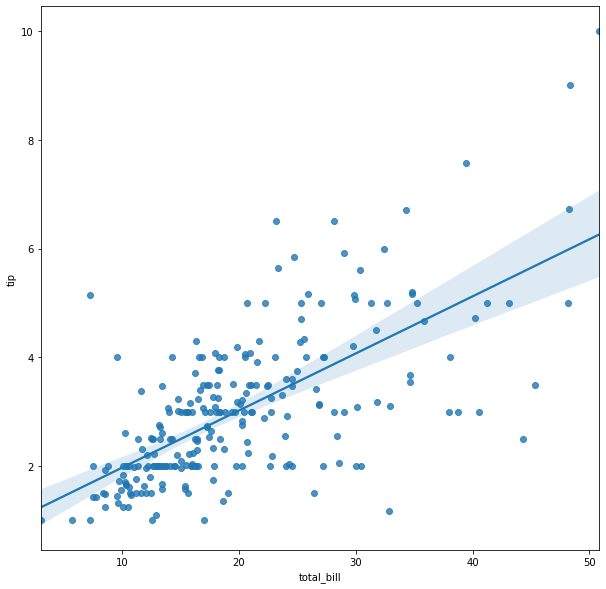

In [7]:
plt.figure(figsize=(10,10))
sns.regplot(x='total_bill', y='tip', data=tips)

### Modeling

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [8]:
sm_lm= OLS(tips['tip'],sm.add_constant(tips[['total_bill']]))
result=sm_lm.fit()

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        09:58:36   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

F-Test:  

B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.  

Partial Test:  
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0.  
2. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers  

Parameter Estimate:  
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval  
2. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar)  
3. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:  

R-Squared = 45.7% : This model can explain 45.7% variation of tips.

### What Is R-Squared?
R-squared (R2) is **a statistical measure that represents the proportion of the variance for a dependent variable** that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, **if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs**.  

The value of R-squared is between 0-1.

** R-squared 15% vs R-squared 85% ** 

<img src= "https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_highvar.png?w=375&ssl=1">
<img src= "https://i2.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_lowvar.png?w=376&ssl=1">


In [ ]:
Try make your own model, with Y=tip and X= Size. 

### Multiple Linear Regression

* Linear regression with more than one features/variables.

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1uaRLGOXh84wwjEHFrqQTzkRodZILabeGzw&usqp=CAU)

Let's use Total Bill and Size as features 


To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [11]:
tips[['size','total_bill','tip']]

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [12]:
tips[['size','total_bill','tip']].describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


In [14]:
tips[['size','total_bill','tip']].corr()

,size,total_bill,tip
size,1.000000,0.598315,0.489299
total_bill,0.598315,1.000000,0.675734
tip,0.489299,0.675734,1.000000


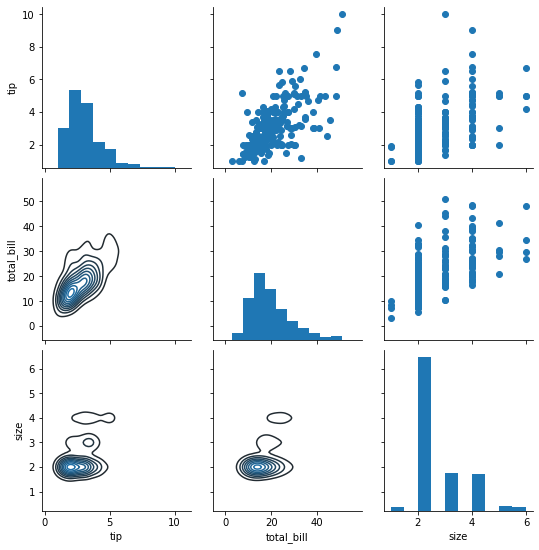

In [16]:
g=sns.PairGrid(tips[['tip','total_bill','size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [17]:
sm_lm = OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result = sm_lm.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           9.67e-34
Time:                        10:38:03   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

Interpretation?

F-Test:  

B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.  

Partial Test:  
* B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0.  
* B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers  
* B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers  

Parameter Estimate:
* B0 = 0.689 : This is not meaningfull to be interpreted  
* B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)  
* B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6)  
* It is strongly recommended to interprete within the interval of predictor and no changes in another variable  

Coefficient Determination:  

R-Square adj = 46.3% : This model can explain 46.3% variation of tips.  

(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)

### Diagnostics and Collinearity

* Normality Assumption  (context regresi)
* Gauss-Markov Assumption  
* Multicollinearity

**Normality Assumption (On Residual) **

Residual adalah selisih antara nilai sebenarnya dikurangi dengan nilai prediksi. 

Text(0.5, 0, 'Residual')

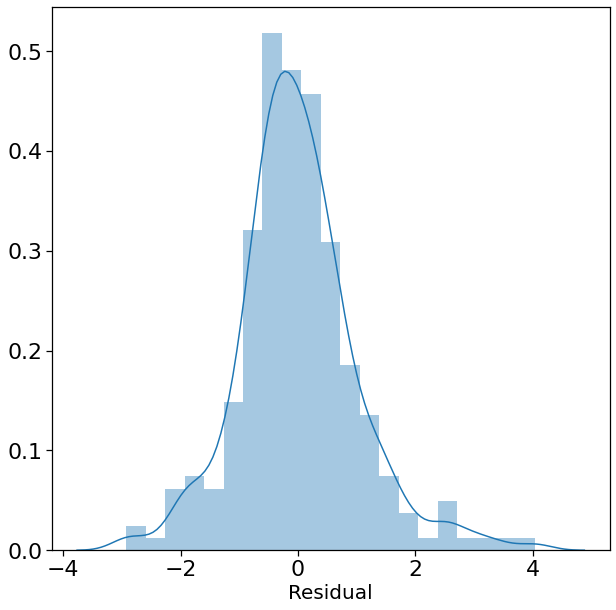

In [25]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residual',fontsize=20)

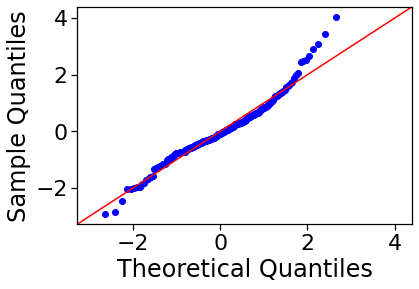

In [23]:
sm.qqplot(result.resid, line='45')
plt.show()

The “QQ” in QQ plot means quantile-quantile — that is, the QQ plot compares the quantiles of our data against the quantiles of the desired distribution. The more linear along the line, the better.

**Gauss-Markov Assumption**

Rata-rata error pada populasi adalah nol, error tidak berkorelasi dengan error lainnya, dan error memiliki ragam yang homogen.


Text(0, 0.5, 'Residual')

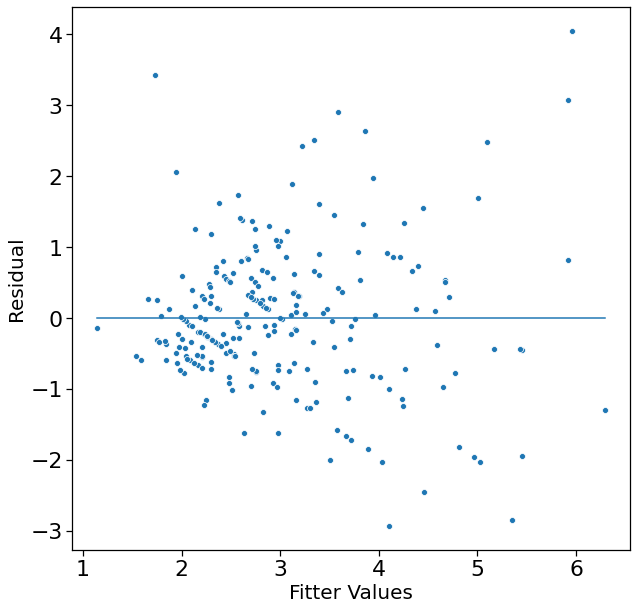

In [27]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitter Values',fontsize=20)
plt.ylabel('Residual',fontsize=20)

**Multicollinearity**  

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other.  
It can caused a biased result of p-value and unreliability on coefficient.

**The Characteristics Multicollinearity**

* Having High R2 but only few significant t ratios.  

* F-test rejects the null hypothesis, but none of the individual t-tests are rejected.  

* Correlations between pairs of X variables (independent variables) are stronger than Correlations between each of X variables with Y variables (dependent variables).  

**How to Identify Multicollinearity ?**  

The variance inflation factor (VIF) is a relative measure of the increase in the variance in standard error of beta coefficient because of collinearity.  

**A VIF greater than 10 indicates that collinearity is very high. A VIF value of more than 4 is not acceptable.**  



In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def calc_vif (X):

    #calculating VIF
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

    return(vif)

In [30]:
calc_vif(tips[['total_bill','size']]) #VIF>4, drop salah satu di antara total bill dan size.

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


Assumption Assesment:
* If we refer to the histogram, the residual seemed normally distributed  
* Model residuals gather around zero  
* No certain pattern in the residual plot  
* Heteroscedasticity Occur  (what we want is Homoscedasticity)

<img src= "https://upload.wikimedia.org/wikipedia/en/thumb/5/5d/Hsked_residual_compare.svg/330px-Hsked_residual_compare.svg.png" style="background-color:white;padding:20px;" >

* vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.  

## Preprocessing: Dummy Variables

What to do if you have categorical data?

In [2]:
df_categorical = pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta','Bogor','Bogor','Bekasi','Bekasi','Jakarta','Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income': [20000000,15000000,7000000,9000000,12000000,11000000,9000000]
})
df_categorical

,Gender,City,Age,Income
0,Male,Jakarta,34,20000000
1,Female,Bogor,28,15000000
2,Female,Bogor,23,7000000
3,Male,Bekasi,26,9000000
4,Female,Bekasi,29,12000000
5,Female,Jakarta,25,11000000
6,Male,Bekasi,25,9000000


In [3]:
df_dummy=pd.get_dummies(df_categorical,drop_first=True)
df_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20000000,1,0,1
1,28,15000000,0,1,0
2,23,7000000,0,1,0
3,26,9000000,1,0,0
4,29,12000000,0,0,0
5,25,11000000,0,0,1
6,25,9000000,1,0,0


In [6]:
sm_lm=OLS(df_dummy['Income'], sm.add_constant(df_dummy.drop('Income',axis=1)))
result=sm_lm.fit()

In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     12.20
Date:                Wed, 17 Feb 2021   Prob (F-statistic):             0.0772
Time:                        22:04:39   Log-Likelihood:                -105.17
No. Observations:                   7   AIC:                             220.3
Df Residuals:                       2   BIC:                             220.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.916e+07   5.24e+06     -3.657   

* age: jika umur bertambah 1 tahun, maka income akan naik kira-kira sebesar 985,200
* gender_male: gaji pria lebih rendah 11.940.000 dibanding wanita
* city_bogor: gaji pekerja yg berasal dari bogor, lebih tinggi 5,657,000 dari pekerja yg berasal dari bekasi
* city_Jakarta: gaji pekerja yg berasal dari jakarta lebih tinggi 8,738,000 dari pekerja yg berasal dari bekasi

## Exercise
Buat dataframe bernama tips_dummy berisi dummy variables  dari 'sex','smoker','day','time' (dengan parameter drop first)  
Buat model multi linear regresi menggunakan: 

* Y : Tips
* X : Total Bill, size, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun, time_Dinner

* Lakukan analisa asumsi untuk linear regresi (residual normality, gauss-markov, multicollinearity)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [38]:
tips_dummy = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [6]:
fitur = ['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']
target = 'tip' 
sm_lm = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           1.20e-28
Time:                        13:06:08   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

### Assumption
we will asses some assumption and check the multicollinearity  
* Normality  
* Gauss-Markov  
* Multicollinearity  

Text(0.5, 0, 'Residuals')

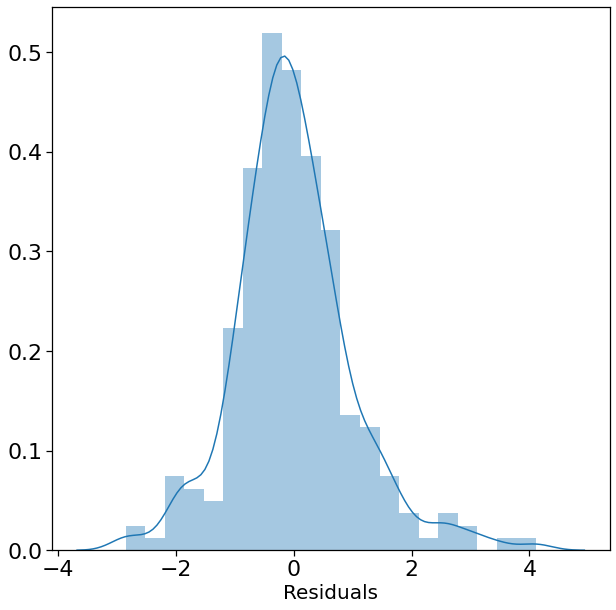

In [36]:
# Normality

plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

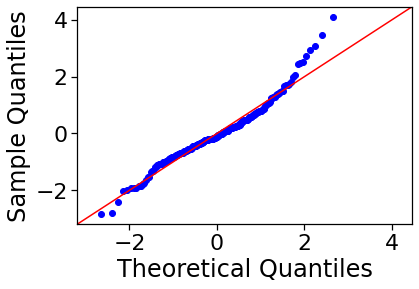

In [37]:
sm.qqplot(result.resid, line = '45')
plt.show()

Text(0, 0.5, 'Residuals')

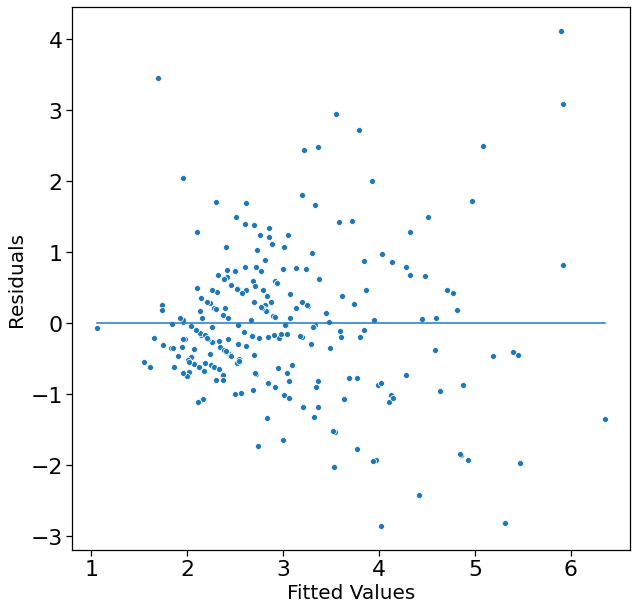

In [38]:
# Gauss-Markov
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

In [39]:
# Multicolinearity

calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


Assumption Assesment:  
* If we refer to the histogram, the residual seemed normally distributed  
* Model residuals gather around zero  
* No certain pattern in the residual plot  
* Heteroscedasticity Occur  
* vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.

We need to improve the model because multicollinearity problem. We refit the linear regression Model with following features:
- Y : tip
- X : total_bill, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun

> ## Model Improvements

In [40]:
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']
target = 'tip' 
sm_lm = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [13]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


No problem in multicollinearity Anymore

## Exercise

In [ ]:
Do the intepretation of the result summary, what can we do to futher improve the model?

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.35e-29
Time:                        15:08:27   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [41]:
fitur = ['total_bill', 'sex_Female', 'smoker_No','time_Dinner']
target = 'tip' 
sm_lm = OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           6.65e-31
Time:                        10:04:58   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7961      0.224      3.561      

* koefisien yg signifikan masih hanya total_bill, dan ada sedikit penurunan pada adj. R squared

In [45]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.621577
1,sex_Female,1.384247
2,smoker_No,2.103581
3,time_Dinner,3.093555


* Tetapi tidak ada lagi multicolinearity

Further reading:

https://towardsdatascience.com/data-science-explaining-r%C2%B2-in-statistics-6f34e7f0a9bb  
https://statisticsbyjim.com/regression/interpret-r-squared-regression/  
https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3  
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86  
https://towardsdatascience.com/what-in-the-world-are-qq-plots-20d0e41dece1  
https://www.statisticshowto.com/multicollinearity/  
https://www.statisticssolutions.com/homoscedasticity/